In [17]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage import draw


Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/Users/Sharon/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


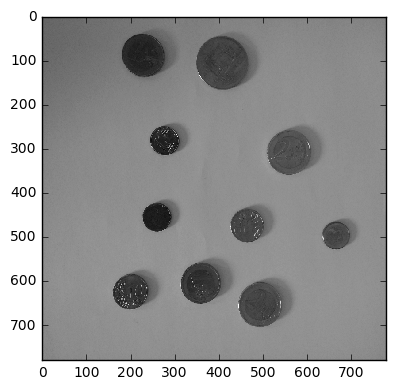

In [18]:
# Image in skimage
from skimage import io

filecoins = './images/coins.jpg'
im_coins = io.imread(filecoins, as_grey = True)

#Image as ubyte
u_coins  = img_as_ubyte(im_coins)

#Scaling the image
u_coins = rescale (u_coins, 0.25)

#Displaying the image
io.imshow(u_coins)


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

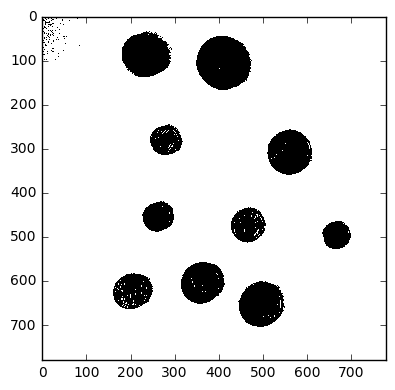

In [19]:
threshold_global_otsu =  threshold_otsu(u_coins)
coin_otsu = u_coins >= threshold_global_otsu
io.imshow(coin_otsu)



Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

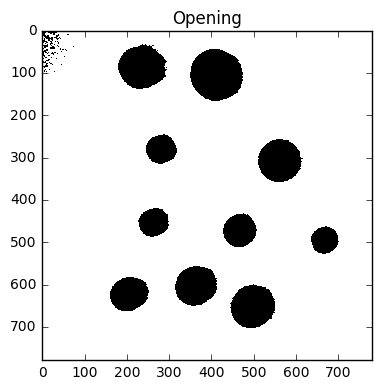

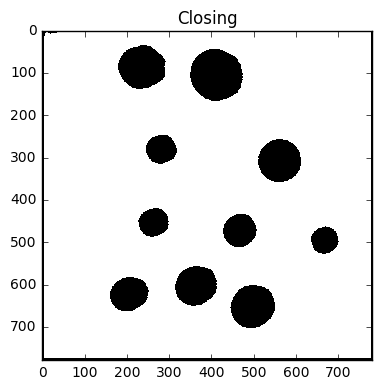

In [20]:
from scipy import ndimage

# Applying opening
# Opening erodes and then dilates. It removes objects smaller than the structuring element. 
coin_op = ndimage.binary_opening(coin_otsu, disk(2))
plt.figure()
plt.title('Opening')
io.imshow (coin_op)


# Applying Closing
# Closing fills holes smaller than the structuring element.
coin_close = ndimage.binary_closing(coin_op, disk(5))
plt.figure()
plt.title('Closing')
io.imshow (coin_close)


# Applying dilation
# Dilation expands the shapes in an image.
#coin_dil = ndimage.binary_dilation(coin_otsu, disk(2))
#plt.figure()
#plt.title('Dilation')
#io.imshow (coin_dil)



Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

There are:   1 regions
The radius of region 0 is:  409.4889396591981


/Users/Sharon/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


IndexError: index 853 is out of bounds for axis 0 with size 780

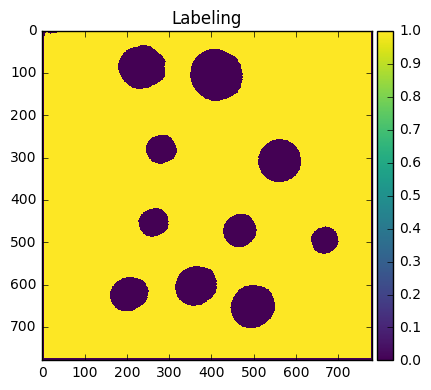

In [60]:
from skimage.measure import label, regionprops
from skimage.color import rgb2gray, gray2rgb
from skimage.draw import circle_perimeter

# 1. Showing the image with different labels
label_coins, n = label(coin_close, return_num = True)


# 2. Showing the number of regions. 
print('There are:  ',n, 'regions')

plt.figure()
plt.title('Labeling')
io.imshow (label_coins)

props_coins = regionprops(label_coins)
circled_coins = gray2rgb(img_as_ubyte(coin_close))

# 3. Displaying the radius of each region 
for i in range(len(props_coins)):
    radius = ( props_coins[i].equivalent_diameter / 2 )
    print ('The radius of region', i, 'is: ', radius) 

    
# Drawing circles on the image
for k in props_coins:
    for  j in range(8):
        [rr, cc] = draw.circle_perimeter(int(k["centroid"][0]), int(k["centroid"][1]), int(k["major_axis_length"] / 2) + j)
        circled_coins[rr, cc] = (255, 0, 0)
        
    
plt.figure()
plt.title('Circled coins')
io.imshow (circled_coins)



## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

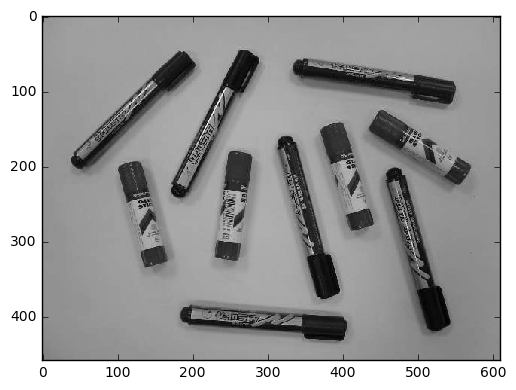

In [25]:
im_objets = rgb2gray(img_as_ubyte(imread("images/objets4.jpg")))

imshow(im_objets)

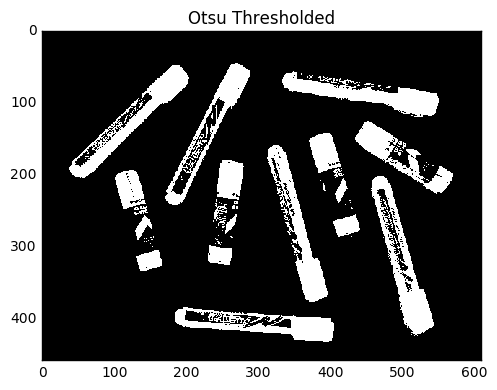

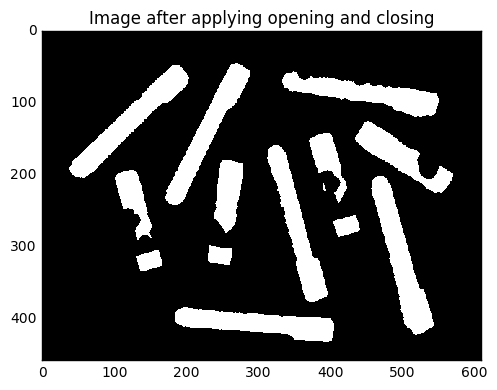

In [37]:
from skimage.morphology import square

#Applying Otsu threshold
im_objets_thresh = im_objets < threshold_otsu(im_objets)
plt.figure(figsize=(8,4))
plt.title("Otsu Thresholded")
imshow(im_objets_thresh)

# Removing noise
im_objets_opened = binary_opening(im_objets_thresh, square(2))

# Filling holes 
im_objets_closed = binary_closing(im_objets_opened, disk(8))

plt.figure()
plt.title("Image after applying opening and closing")
imshow(im_objets_closed)

In [62]:
im_objets_labels = label(im_objets_morph)
im_objets_props = regionprops(im_objets_labels)

num_markers = 0
num_glues = 0

for label_prop in im_objets_props:
    
    #Rule out smaller objects and not correctly joined parts by area
    if(label_prop["area"] > 1000):
        
        # Finding the markers.
        # Markers have an eccentricity of 0,99 approx
        if(label_prop["eccentricity"] > 0.98): 
            num_markers += 1
            
        #If it`s not a marker, the is considered to be a glue.    
        else: 
            num_glues += 1

print("Number of markers =", num_markers )
print("Number of glues =", num_glues )

Number of markers = 6
Number of glues = 4
